In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pickle, dill
import cv2
from tqdm import tqdm
from time import perf_counter
from CombinedModel import CombinedModel

In [2]:
descriptor_1_path = "../BOVW/bovw/train_bovw.pkl"
descriptor_2_path = "../Color/color/train_color_histogram.pkl"

labels_1_path = "../BOVW/bovw/train_labels.pkl"
#labels_2_path = "../Color/color/train_labels.pkl"

path_1_path = "../BOVW/bovw/train_paths.pkl"
#path_2_path = "../Color/color/train_paths.pkl"

In [3]:
comb = CombinedModel([descriptor_1_path, descriptor_2_path], labels_1_path, path_1_path)

In [4]:
comb.features.shape, len(comb.labels)

((11220, 662), 11220)

In [5]:
comb.fit_model("./combined")

SVC fitted in: 28.386849200000142
KNN fitted in: 0.0198777999999038
Random Forest fitted in: 7.208380299999817


              precision    recall  f1-score   support

      savory       0.89      0.90      0.90      5610
    unsavory       0.90      0.89      0.90      5610

    accuracy                           0.90     11220
   macro avg       0.90      0.90      0.90     11220
weighted avg       0.90      0.90      0.90     11220



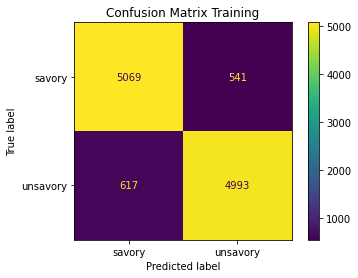

In [6]:
print(classification_report(comb.labels, comb.model.predict(comb.features)))

ConfusionMatrixDisplay.from_estimator(comb.model, comb.features, comb.labels)
plt.title("Confusion Matrix Training")
plt.show()

              precision    recall  f1-score   support

      savory       0.88      0.86      0.87      5610
    unsavory       0.87      0.88      0.87      5610

    accuracy                           0.87     11220
   macro avg       0.87      0.87      0.87     11220
weighted avg       0.87      0.87      0.87     11220



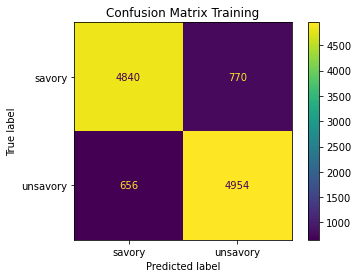

In [7]:
print(classification_report(comb.labels, comb.knn.predict(comb.features)))

ConfusionMatrixDisplay.from_estimator(comb.knn, comb.features, comb.labels)
plt.title("Confusion Matrix Training")
plt.show()

              precision    recall  f1-score   support

      savory       1.00      1.00      1.00      5610
    unsavory       1.00      1.00      1.00      5610

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



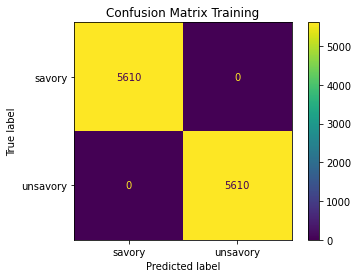

In [8]:
print(classification_report(comb.labels, comb.forest.predict(comb.features)))

ConfusionMatrixDisplay.from_estimator(comb.forest, comb.features, comb.labels)
plt.title("Confusion Matrix Training")
plt.show()

## Validation

In [9]:
path_val = "../../../dataset/valid/"
path_test = "../../../dataset/test/"

val_images_path = list(Path(path_val).rglob(f"*.jpg"))
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

comb = CombinedModel.load_model("./combined/combined_model.pkl")

In [10]:
color_model = CombinedModel.load_model('../Color/color/histogram_model.pkl')
bovw = CombinedModel.load_model('../BOVW/bovw/bovw.pkl')

comb.get_models(bovw, color_model)

Extracting SIFT from image ..\..\..\dataset\valid\unsavory\300.jpg...: 100%|██████████| 600/600 [00:31<00:00, 18.80it/s]


BOVW computed in: 2.0693752999998196


Extracting Color Histogram from image ..\..\..\dataset\valid\unsavory\300.jpg...: 100%|██████████| 600/600 [00:03<00:00, 157.83it/s]


              precision    recall  f1-score   support

      savory       0.83      0.81      0.82       300
    unsavory       0.81      0.84      0.83       300

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



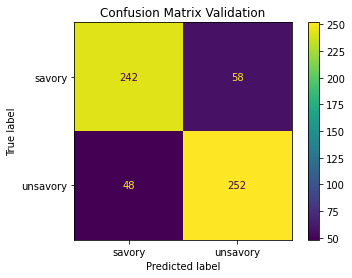

In [11]:
descr_val, labels_val, val_path = comb.extract_descriptor(path_val, 'jpg')

print(classification_report(labels_val, comb.model.predict(descr_val)))

ConfusionMatrixDisplay.from_estimator(comb.model, descr_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

              precision    recall  f1-score   support

      savory       0.81      0.72      0.76       300
    unsavory       0.75      0.83      0.79       300

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



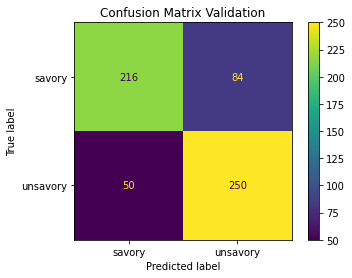

In [12]:
print(classification_report(labels_val, comb.knn.predict(descr_val)))

ConfusionMatrixDisplay.from_estimator(comb.knn, descr_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

              precision    recall  f1-score   support

      savory       0.80      0.82      0.81       300
    unsavory       0.82      0.80      0.81       300

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



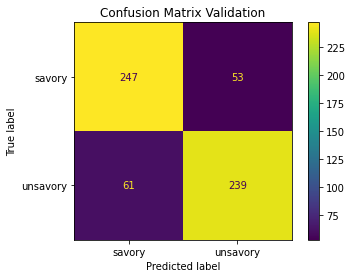

In [13]:
print(classification_report(labels_val, comb.forest.predict(descr_val)))

ConfusionMatrixDisplay.from_estimator(comb.forest, descr_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

## Test

Extracting SIFT from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:31<00:00, 19.11it/s]


BOVW computed in: 1.7006505000003926


Extracting Color Histogram from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:02<00:00, 256.85it/s]


              precision    recall  f1-score   support

      savory       0.87      0.91      0.89       300
    unsavory       0.90      0.87      0.88       300

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



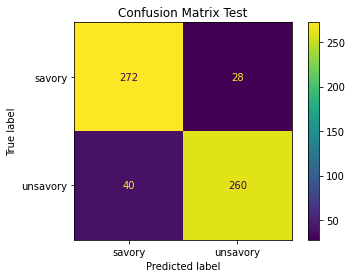

In [14]:
descr_test, labels_test, test_path = comb.extract_descriptor(path_test, 'jpg')

print(classification_report(labels_test, comb.model.predict(descr_test)))

ConfusionMatrixDisplay.from_estimator(comb.model, descr_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

              precision    recall  f1-score   support

      savory       0.80      0.85      0.82       300
    unsavory       0.84      0.78      0.81       300

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



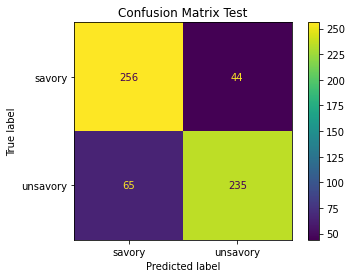

In [15]:
print(classification_report(labels_test, comb.knn.predict(descr_test)))

ConfusionMatrixDisplay.from_estimator(comb.knn, descr_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

              precision    recall  f1-score   support

      savory       0.88      0.92      0.90       300
    unsavory       0.92      0.88      0.90       300

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



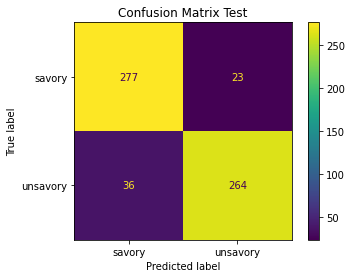

In [16]:
print(classification_report(labels_test, comb.forest.predict(descr_test)))

ConfusionMatrixDisplay.from_estimator(comb.forest, descr_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

## CBIR

In [17]:
for p in test_images_path:
    pred, k_similar = CombinedModel.cbir('./combined/combined_model.pkl', p, None, None)
    print(pred)
    print(k_similar)
    break

BOVW computed in: 0.0027140000001963926
KDTree computed in: 1.3930804000001444
10 most similar found in: 0.016593700000157696
['savory']
['..\\dataset\\train\\unsavory\\0116.jpg', '..\\dataset\\train\\savory\\0157.jpg', '..\\dataset\\train\\unsavory\\4357.jpg', '..\\dataset\\train\\unsavory\\4579.jpg', '..\\dataset\\train\\savory\\3844.jpg', '..\\dataset\\train\\savory\\5159.jpg', '..\\dataset\\train\\unsavory\\5033.jpg', '..\\dataset\\train\\savory\\3679.jpg', '..\\dataset\\train\\unsavory\\4275.jpg', '..\\dataset\\train\\savory\\0260.jpg']
